In [455]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats




plt.style.use('ggplot')

# read the csv file
df = pd.read_csv('weight-height.csv')

# print the first 5 rows of the data set
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [456]:
# shape of the dataframe
df.shape

(10000, 3)

In [457]:
# data type of each column
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [458]:
# number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [459]:
# number of unique values of column Gender
df.Gender.nunique()
# 2

2

In [460]:
# unique values of column Gender
df.Gender.unique()
# array(['Male', 'Female'], dtype=object)

array(['Male', 'Female'], dtype=object)

Text(0, 0.5, 'Frequency')

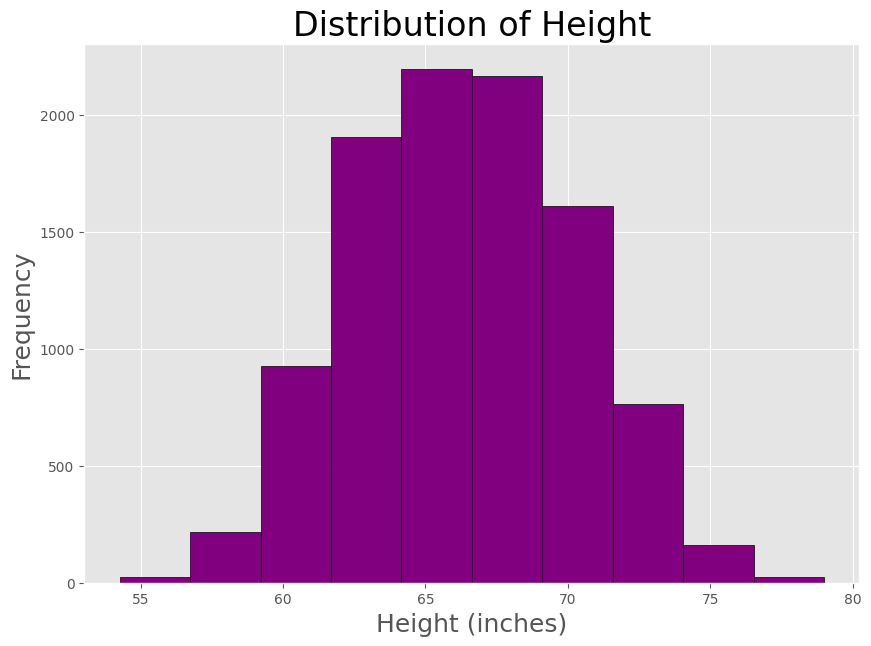

In [461]:
# histogram of the height
df.Height.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18)

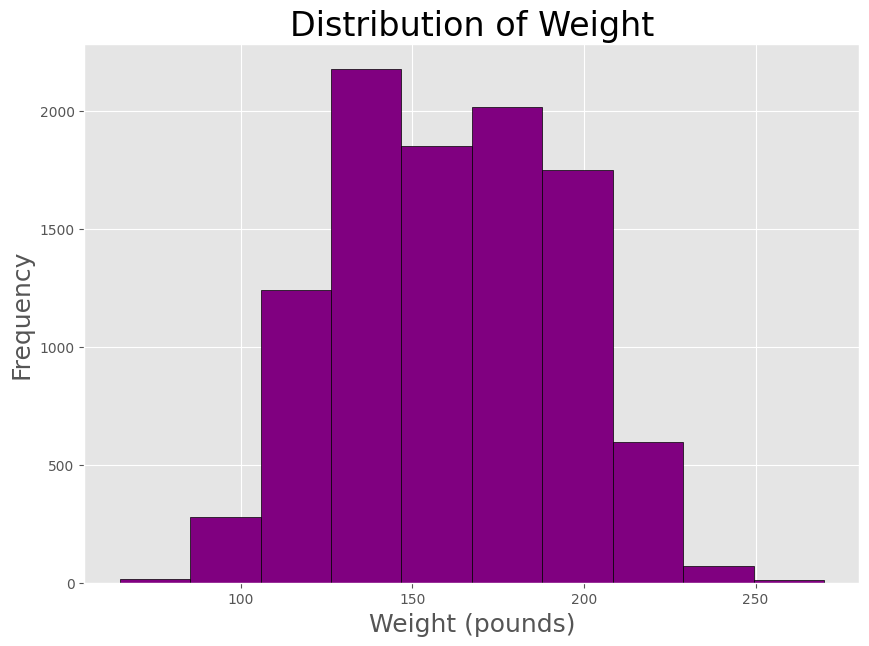

In [462]:
# histogram of the weight
df.Weight.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

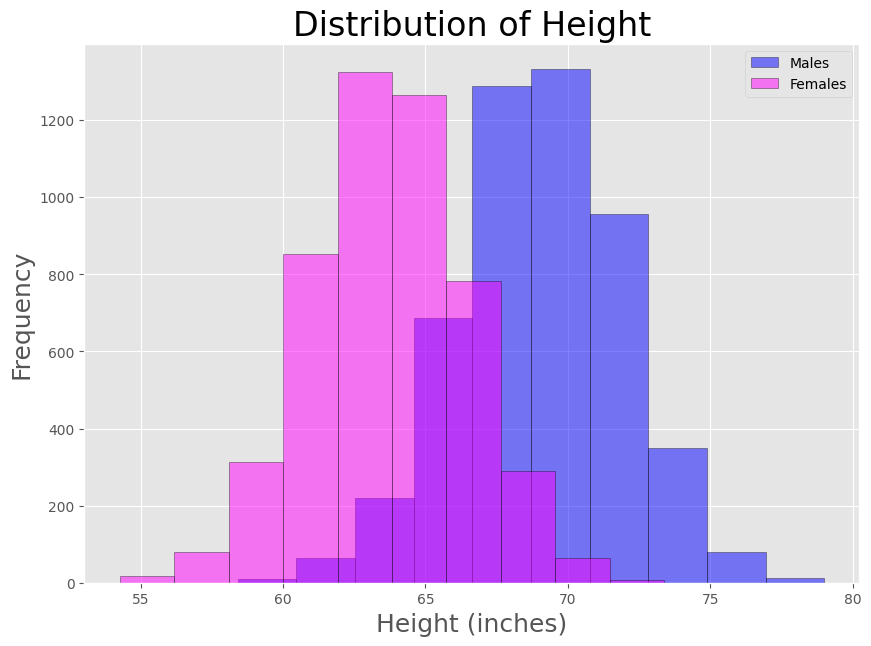

In [463]:
# histogram of the height - males and females

df[df['Gender'] == 'Male'].Height.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Height.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18);

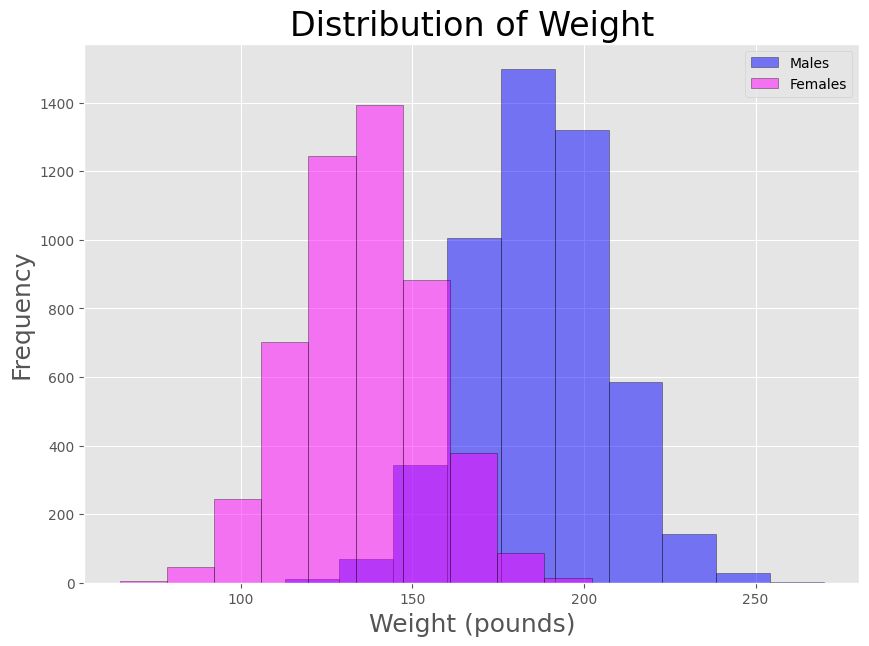

In [464]:
# histogram of the weight - males and females

df[df['Gender'] == 'Male'].Weight.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Weight.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

In [465]:

# Descriptive statistics male
statistics_male = df[df['Gender'] == 'Male'].describe()
statistics_male.rename(columns=lambda x: x + '_male', inplace=True)

In [466]:
# Descriptive statistics female
statistics_female = df[df['Gender'] == 'Female'].describe()
statistics_female.rename(columns=lambda x: x + '_female', inplace=True)

In [467]:
# Dataframe that contains statistics for both male and female
statistics = pd.concat([statistics_male, statistics_female], axis=1)
statistics

,Height_male,Weight_male,Height_female,Weight_female
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,69.026346,187.020621,63.708774,135.860093
std,2.863362,19.781155,2.696284,19.022468
min,58.406905,112.902939,54.263133,64.700127
25%,67.174679,173.887767,61.894441,122.934096
50%,69.027709,187.033546,63.730924,136.117583
75%,70.988744,200.357802,65.563565,148.810926
max,78.998742,269.989699,73.389586,202.237214


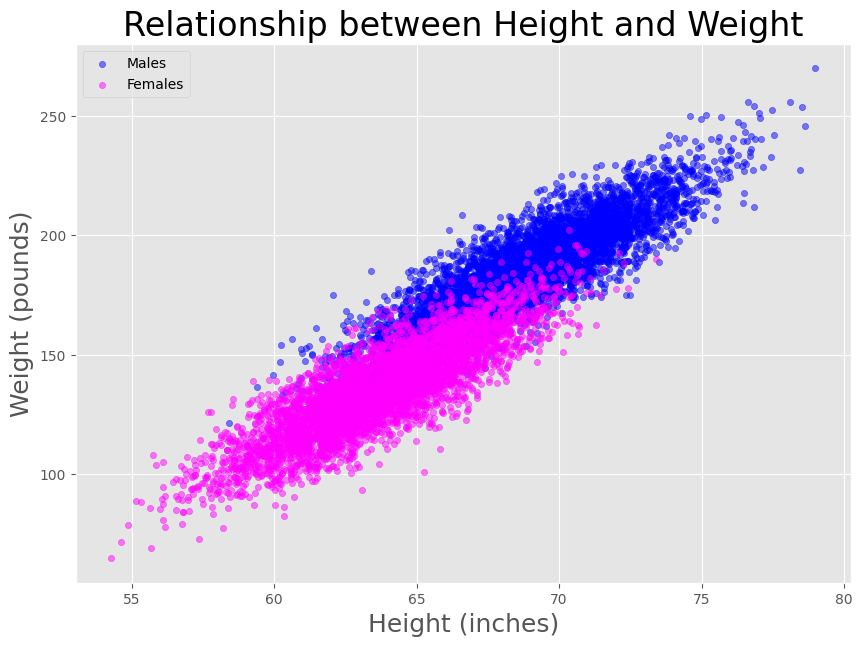

In [468]:
# Scatter plot of Height and Weight

ax1 = df[df['Gender'] == 'Male'].plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

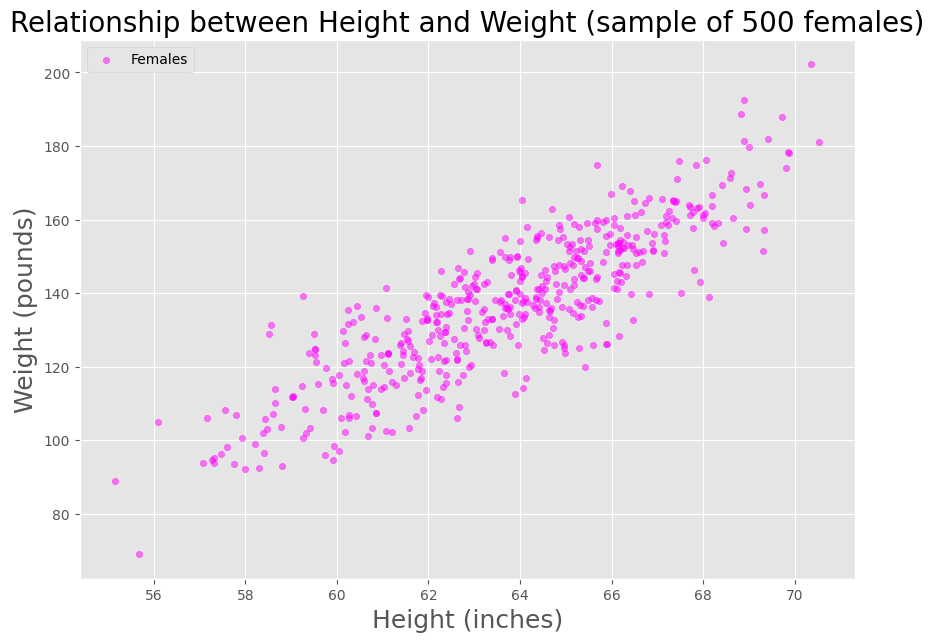

In [469]:
# Scatter plot of 500 females

sample_females = df[df['Gender'] == 'Female'].sample(500)
sample_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Females'])
plt.title('Relationship between Height and Weight (sample of 500 females)', size=20)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [470]:
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

In [471]:
# polynomial - males
male_fit = np.polyfit(df_males.Height, df_males.Weight, 1)
male_fit

array([   5.96177381, -224.49884071])

In [472]:
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)
female_fit

array([   5.99404661, -246.01326575])

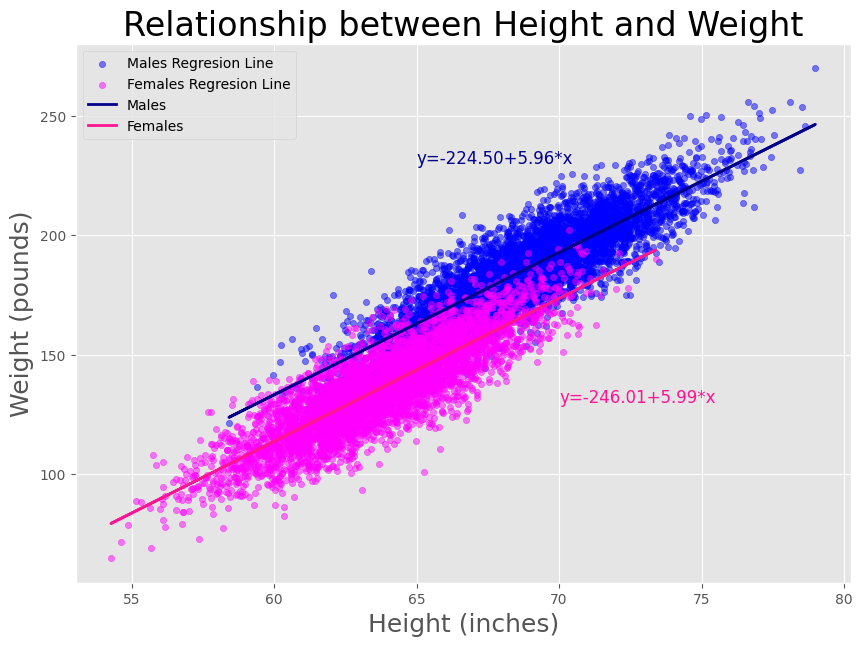

In [473]:
ax1 = df_males.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)

# regression lines
plt.plot(df_males.Height, male_fit[0] * df_males.Height + male_fit[1], color='darkblue', linewidth=2)
plt.plot(df_females.Height, female_fit[0] * df_females.Height + female_fit[1], color='deeppink', linewidth=2)

# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink', size=12)

# legend, title and labels.
plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

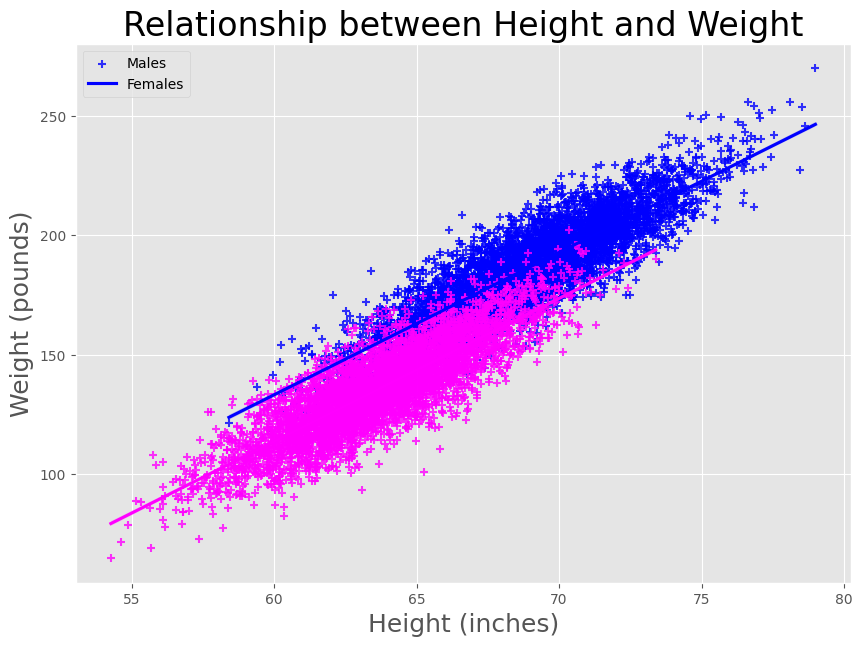

In [474]:
# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_males.Height, y=df_males.Weight, color='blue', marker='+')
sns.regplot(x=df_females.Height, y=df_females.Weight, color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

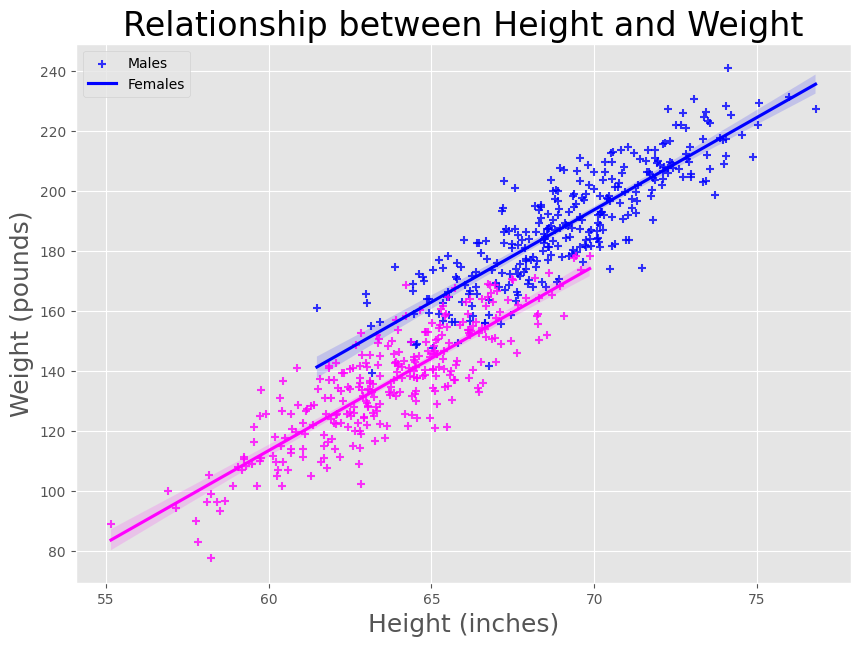

In [475]:
# 300 random samples
df_males_sample = df[df['Gender'] == 'Male'].sample(300)
df_females_sample = df[df['Gender'] == 'Female'].sample(300)

# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_males_sample.Height, y=df_males_sample.Weight, color='blue', marker='+')
sns.regplot(x=df_females_sample.Height, y=df_females_sample.Weight, color='magenta', marker='+')

# legend, title, and labels.
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [476]:
# create linear regression object
lr_males = LinearRegression()

# fit linear regression
lr_males.fit(df_males[['Height']], df_males['Weight'])

# get the slope and intercept of the line best fit
print(lr_males.intercept_)
# -224.49884070545772

print(lr_males.coef_)
# 5.96177381

-224.49884070545863
[5.96177381]


/Users/mjcarnaje/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:753: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mjcarnaje/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:591: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mjcarnaje/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:600: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [477]:
df_females = df[df['Gender'] == 'Female']

# fit the model using numpy
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)

# predictions using numpy
print(np.polyval(female_fit, [60]))
# [113.62953114]

# fit the model using scikit learn
lr_females = LinearRegression()
lr_females.fit(df_females[['Height']], df_females['Weight'])

# predictions using scikit learn
print(lr_females.predict([[60]]))


[113.62953114]
[113.62953114]


/Users/mjcarnaje/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:753: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mjcarnaje/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:591: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mjcarnaje/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:600: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mjcarnaje/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was

In [478]:
# dataframe containing only females
df_females = df[df['Gender'] == 'Female']

# correlation coefficients for numeric columns only
correlation = df_females[['Height', 'Weight']].corr()
print(correlation)

          Height    Weight
Height  1.000000  0.849609
Weight  0.849609  1.000000


In [479]:
df_females = df[df['Gender'] == 'Female']

pearson_coef, p_value = stats.pearsonr(df_females.Height, df_females.Weight)

print(pearson_coef)
# 0.849608591418601

# dataframe containing only males
df_males = df[df['Gender'] == 'Male']

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_males.Height, df_males.Weight)

print(pearson_coef)

0.8496085914186005
0.862978848616317


Text(0, 0.5, 'Weight (pounds)')

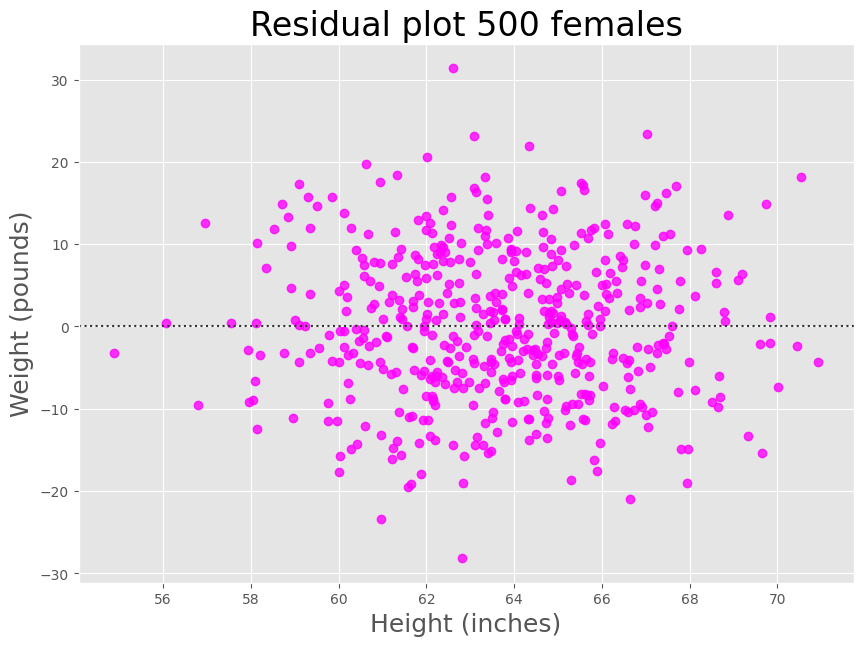

In [480]:
# dataframe containing only females
df_females = df[df['Gender'] == 'Female'].sample(500)

# residual plot 500 females
fig = plt.figure(figsize=(10, 7))
sns.residplot(x='Height', y='Weight', data=df_females, color='magenta')

# title and labels
plt.title('Residual plot 500 females', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)

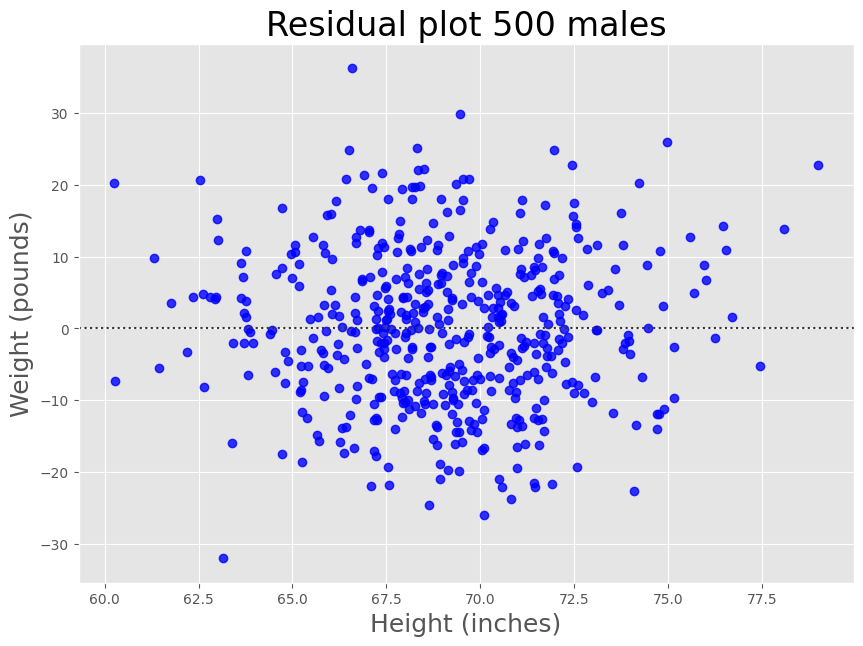

In [481]:

# dataframe containing only males
df_males = df[df['Gender'] == 'Male'].sample(500)

# residual plot 500 males
fig = plt.figure(figsize=(10, 7))
sns.residplot(x='Height', y='Weight', data=df_males, color='blue')


# title and labels
plt.title('Residual plot 500 males', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [487]:
df_dummy = pd.get_dummies(df)

df_dummy.drop('Gender_Female', axis=1, inplace=True)

# rename Gender_Male column
df_dummy.rename(columns={'Gender_Male': 'Gender'}, inplace=True)

# df_dummy dataframe first 5 columns
df_dummy.head()

,Height,Weight,Gender
0,73.847017,241.893563,True
1,68.781904,162.310473,True
2,74.110105,212.740856,True
3,71.730978,220.042470,True
4,69.881796,206.349801,True


In [489]:
# create linear regression object
mlr = LinearRegression()

# fit linear regression
mlr.fit(df_dummy[['Height', 'Gender']], df_dummy['Weight'])

# get the slope and intercept of the line best fit.
print(mlr.intercept_)
# -244.92350252069903

print(mlr.coef_)
# [ 5.97694123 19.37771052]

-244.92350252069977
[ 5.97694123 19.37771052]


/Users/mjcarnaje/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:753: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mjcarnaje/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:591: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mjcarnaje/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:600: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
